In [1]:
# To do
# Load beers in
# Run nltk on the beers to get frequency counts

# Get list of keywords for each beer
# Store data in easily reachable way
# Run tf-idf to get list of keywords
# Compare each list of words for each beer by clustering. PCA and not kmeans?
# Get clusters and store them in an easily accessible way
# Input a beer and get the keywords for that beer OR input a list of keywords to match to.

import re
import json
import nltk
import numpy as np
import pandas as pd
import string
from collections import OrderedDict
from nltk.corpus import stopwords

In [3]:
beer1 = pd.read_csv('../beers/SamuelAdamsWinterLager.csv')
wordlist = beer1['words'][0].split(',')
words = [wordlist[t].translate(wordlist[t].maketrans("","", string.punctuation)) for t in range(len(wordlist))]
words = [x.strip(' ') for x in words]

In [4]:
sr = stopwords.words('english')
clean_tokens = words[:]
for token in words:
    if token in stopwords.words('english'):
        clean_tokens.remove(token)
freq = nltk.FreqDist(clean_tokens)
for key,val in freq.items():
    print(str(key) + ':' + str(val))

old:5
undated:1
notes:10
draft:4
reddishorange:1
seethrough:1
liquid:1
decent:7
offwhite:3
head:39
strong:5
lacing:16
banana:3
bread:10
nose:9
inviting:3
medium:27
mouthfeel:10
taste:34
splits:1
difference:1
macro:2
lager:29
drinkable:4
disappointing:3
nice:43
remember:1
sam:10
adams:17
boston:10
swill:1
alternative:1
bmc:1
seem:3
like:30
much:11
winter:37
nutmeg:8
meh:1
another:4
beer:61
foam:5
glass:24
also:4
find:2
bit:13
sweet:27
side:4
think:2
buy:5
one:14
seasonal:5
selection:1
samuel:10
hops:9
liked:1
drink:6
gloomy:1
incredibly:1
snowy:1
day:6
nothing:9
want:3
stay:1
inside:1
love:4
german:4
well:15
always:2
try:6
least:2
six:3
packs:1
throughout:1
tough:1
around:10
time:7
year:2
either:5
convenience:1
sake:1
im:7
diggin:1
right:5
flavor:26
makes:5
real:3
syrupy:4
soothing:1
rainy:1
basically:2
done:2
red:9
ale:6
look:7
added:2
spices:30
solid:7
pretty:12
unique:3
cant:3
say:4
excellent:2
cold:6
weather:3
brew:16
maybe:6
truly:1
bock:17
pick:4
every:2
glad:1
looking:2
ba:1
revi

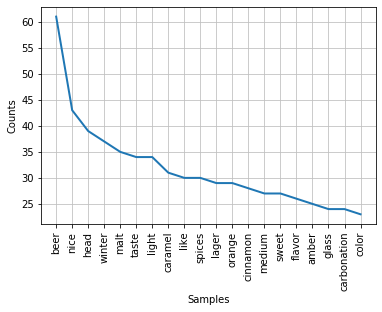

In [5]:
freq.plot(20, cumulative=False)

NameError: name 'docs' is not defined

In [51]:
beers = pd.read_csv('../beers/beers_pt1.csv')
beers['words']

0         ['pours', 'dark', 'brow', 'almost', 'looks', '...
1         ['medium', 'capped', 'version', 'chalice', 'op...
2         ['pleasant', 'surprise', 'quite', 'good', 'rel...
3         ['bottled', 'april', '117th', 'day', 'hoping',...
4         ['12oz', 'bottle', 'first', 'expierence', 'bra...
                                ...                        
139781    ['bottle', 'poured', 'goblet', 'clear', 'beaut...
139782    ['pours', 'typical', 'clear', 'golden', 'color...
139783    ['red', 'light', 'haze', 'lots', 'champagne', ...
139784    ['clear', 'redamber', 'color', 'light', 'flow'...
139785    ['pours', 'golden', 'orange', 'extremely', 'fi...
Name: words, Length: 139786, dtype: object

In [53]:
def pre_process(text):
    # lowercase
    text=text.lower()
    #remove tags
    text=re.sub("<!--?.*?-->","",text)
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    return text

beers['words'] = beers['words'].apply(lambda x:pre_process(x)) 

In [54]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

cv = CountVectorizer(min_df=0.01, max_df=0.85,stop_words='english')
word_count_vector = cv.fit_transform(beers['words'])

In [55]:
print(np.shape(word_count_vector))
list(cv.vocabulary_.keys())[:10]

(139786, 1163)


['pours',
 'dark',
 'looks',
 'black',
 'held',
 'light',
 'aggressive',
 'pour',
 'sized',
 'tan']

In [56]:
from sklearn.feature_extraction.text import TfidfTransformer
 
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(word_count_vector)

TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)

In [13]:
# Choose a random beer and test this shit
randbeer = np.random.randint(0, len(beers))

In [31]:
beers['words']

,Unnamed: 0,name,brewery,style,score,ABV,nreviews,words
0,0,The Big Smoke,8 Wired Brewing Co.,Smoke Porter,87.0,6.2,69.0,pours dark brow almost looks black held light...
1,0,La Félix,"Le Bilboquet, Brasseur Artisan",German Eisbock,87.0,11.9,5.0,medium capped version chalice opacity almost ...
2,0,Final Absolution Trippel,Dragonmead Microbrewery,Belgian Tripel,91.0,10.0,224.0,pleasant surprise quite good relative america...
3,0,'Merica,Prairie Artisan Ales,Belgian Saison,92.0,7.5,130.0,bottled april th day hoping developed nicely ...
4,0,White Winter Brackett,"White Winter Winery, Inc.",Braggot,0.0,5.0,6.0,oz bottle first expierence braggot im looking...
...,...,...,...,...,...,...,...,...
69888,0,Commercial Suicide,Jester King Brewery,English Dark Mild Ale,81.0,2.9,109.0,bottle poured goblet clear beautiful copper r...
69889,0,Zhujiang Beer,Guangzhou Zhujiang Brewery Co. Ltd.,Japanese Rice Lager,72.0,4.3,8.0,pours typical clear golden color two fingers ...
69890,0,Red Trolley Ale,Karl Strauss Brewing Company,Irish Red Ale,81.0,5.8,149.0,red light haze lots champagne like carbonatio...
69891,0,Fat Tire Amber Ale,New Belgium Brewing Company,American Amber / Red Ale,82.0,5.2,2118.0,clear redamber color light flow small bubbles...


In [65]:
q = beers[beers.nreviews > 5]

139786